In [1]:
import sys
import os

import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation


from IPython import display

import time

In [2]:
%matplotlib inline

In [3]:
# sys.path.insert(0, '..\\scripts')
sys.path.insert(0, '../scripts')

In [4]:
import extract_annotations as E
import export as EXP

In [5]:
RAW_DATA = E.extract()

In [6]:
LABELS = RAW_DATA["labels"]
DATA = RAW_DATA['data']
print("DATA", len(DATA))
print("LABELS", len(LABELS))
print(DATA[0])

DATA 3768
LABELS 42
['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/127_png_jpg.rf.03b481ce8bb8820798baf10651385b2f.jpg', [4], [[0.50390625, 0.58515625, 0.1734375, 0.1953125, 'chevron_markers']]]


### Transform data to Pandas Dataframe

In [7]:
DATA[23][2]

[[0.4921875, 0.64921875, 0.0703125, 0.0734375, 'speed_limit']]

In [8]:
BBOX_DATA = []
for D in DATA:
    for coord in D[2]:
        BBOX = np.concatenate((np.array(D[0]),np.array(coord, object)), axis=None)
        BBOX_DATA.append(BBOX)

In [9]:
BBOX_DATA = np.array(BBOX_DATA)

In [10]:
BBOX_DATA.shape

(5440, 6)

In [11]:
BBOX_X = BBOX_DATA.T[0]
BBOX_Y = BBOX_DATA.T[1]

In [12]:
print(BBOX_X.shape, BBOX_Y.shape)

(5440,) (5440,)


In [13]:
BBOX_DATA

array([['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/127_png_jpg.rf.03b481ce8bb8820798baf10651385b2f.jpg',
        0.50390625, 0.58515625, 0.1734375, 0.1953125, 'chevron_markers'],
       ['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/022_png_jpg.rf.f593e7910407f8ccaf28e01e79db94c3.jpg',
        0.33828125, 0.415625, 0.2265625, 0.109375, 'directional_normal'],
       ['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/1673415420-637415_jpg.rf.c2491584f590be249c683ff27c0dfa6c.jpg',
        0.49921875, 0.38671875, 0.05, 0.06640625, 'speed_limit'],
       ...,
       ['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/1673327210-303787_jpg.rf.803d818abaefa8f55df8ae355339e678.jpg',
        0.66640625, 0.2265625, 0.084375, 0.10625,
        'pedestrian_crossing_ahead'],
       ['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/1673327210

#### Dataframe

In [14]:
df = pd.DataFrame(BBOX_DATA, columns = ['path','norm_x_center','norm_y_center', 'norm_width', 'norm_height', 'label' ])

In [15]:
df["norm_area"] = df["norm_width"] * df["norm_height"]

In [16]:
df

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
0,/home/pasannissanka/Projects/SignRecognition/c...,0.503906,0.585156,0.173437,0.195312,chevron_markers,0.033875
1,/home/pasannissanka/Projects/SignRecognition/c...,0.338281,0.415625,0.226562,0.109375,directional_normal,0.02478
2,/home/pasannissanka/Projects/SignRecognition/c...,0.499219,0.386719,0.05,0.066406,speed_limit,0.00332
3,/home/pasannissanka/Projects/SignRecognition/c...,0.909375,0.478906,0.033594,0.035156,pedestrian_crossing,0.001181
4,/home/pasannissanka/Projects/SignRecognition/c...,0.720313,0.41875,0.075,0.078125,merge_ahead,0.005859
...,...,...,...,...,...,...,...
5435,/home/pasannissanka/Projects/SignRecognition/c...,0.669531,0.538281,0.092969,0.117969,merge_ahead,0.010967
5436,/home/pasannissanka/Projects/SignRecognition/c...,0.101562,0.46875,0.05,0.05,no_u_turn,0.0025
5437,/home/pasannissanka/Projects/SignRecognition/c...,0.666406,0.226562,0.084375,0.10625,pedestrian_crossing_ahead,0.008965
5438,/home/pasannissanka/Projects/SignRecognition/c...,0.720313,0.244531,0.028125,0.029687,parking,0.000835


In [17]:
df.describe()

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
count,5440,5440.0000,5440.000000,5440.000000,5440.000000,5440,5440.000000
unique,3768,1216.0000,895.000000,407.000000,371.000000,42,2757.000000
top,/home/pasannissanka/Projects/SignRecognition/c...,0.4625,0.464062,0.051562,0.054688,pedestrian_crossing,0.000747
freq,10,14.0000,29.000000,102.000000,109.000000,607,18.000000


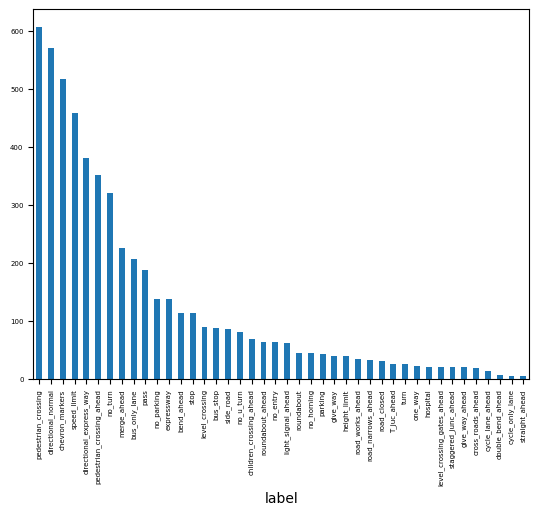

In [19]:
df['label'].value_counts().plot(kind='bar', fontsize=5)
plt.savefig("output/class_distribution.png")

<Axes: ylabel='Density'>

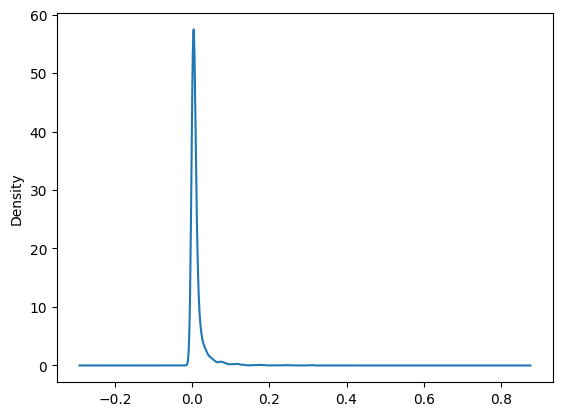

In [18]:
df['norm_area'].plot(kind='kde')

label
T_juc_ahead                   Axes(0.125,0.11;0.775x0.77)
bend_ahead                    Axes(0.125,0.11;0.775x0.77)
bus_only_lane                 Axes(0.125,0.11;0.775x0.77)
bus_stop                      Axes(0.125,0.11;0.775x0.77)
chevron_markers               Axes(0.125,0.11;0.775x0.77)
children_crossing_ahead       Axes(0.125,0.11;0.775x0.77)
cross_roads_ahead             Axes(0.125,0.11;0.775x0.77)
cycle_lane_ahead              Axes(0.125,0.11;0.775x0.77)
cycle_only_lane               Axes(0.125,0.11;0.775x0.77)
directional_express_way       Axes(0.125,0.11;0.775x0.77)
directional_normal            Axes(0.125,0.11;0.775x0.77)
double_bend_ahead             Axes(0.125,0.11;0.775x0.77)
expressway                    Axes(0.125,0.11;0.775x0.77)
give_way                      Axes(0.125,0.11;0.775x0.77)
give_way_ahead                Axes(0.125,0.11;0.775x0.77)
height_limit                  Axes(0.125,0.11;0.775x0.77)
hospital                      Axes(0.125,0.11;0.775x0.77)
level_cr

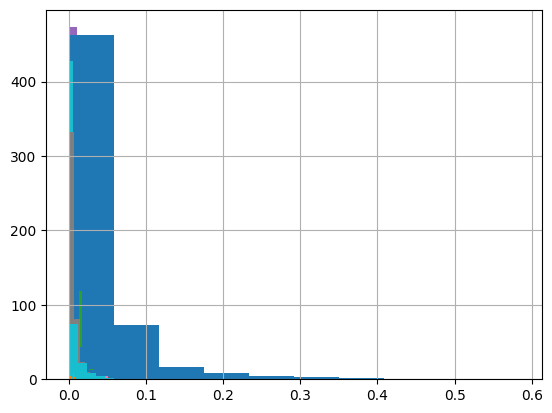

In [19]:
df.groupby('label').norm_area.hist()

In [20]:
df_sort_area = df.sort_values(by=["norm_area"])
df_sort_area.head(50)['norm_area']

2668    0.000015
4423    0.000026
4530    0.000044
3921    0.000056
707     0.000061
232     0.000085
116     0.000085
147     0.000098
125     0.000098
3183    0.000105
230      0.00011
1395     0.00011
1402     0.00011
146      0.00011
115     0.000117
231     0.000117
168     0.000117
1403    0.000117
1396    0.000117
3166    0.000128
4325    0.000128
145     0.000132
724     0.000132
124     0.000132
167     0.000132
126     0.000132
691     0.000137
4350    0.000142
127     0.000154
706     0.000154
182     0.000156
425     0.000156
4217    0.000159
3167    0.000167
2810    0.000167
3165    0.000167
1068    0.000171
690     0.000171
166     0.000171
2057    0.000171
2063    0.000171
693     0.000176
420     0.000176
538     0.000182
4422    0.000182
2809    0.000182
181     0.000188
4517    0.000188
2951    0.000192
692     0.000195
Name: norm_area, dtype: object

In [21]:
def area_range(_df, area):
    d = []
    df_area = _df.loc[_df["norm_area"] <= area]
    for idx, row in df_area.iterrows():
        df_same_img = _df.loc[_df["path"] == row["path"]]
        if len(df_same_img) == 1:
            d.append(row)
        else:
            if (df_same_img['norm_area'] <= area).all():
                d.append(row)
            
    return pd.DataFrame(d)

In [22]:
_f = area_range(df,0.001)
_f

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
48,D:\Personal\sign_recognition\notebooks\..\scri...,0.229687,0.308594,0.028125,0.031250,speed_limit,0.000879
61,D:\Personal\sign_recognition\notebooks\..\scri...,0.534375,0.450781,0.028125,0.032813,no_turn,0.000923
63,D:\Personal\sign_recognition\notebooks\..\scri...,0.116406,0.353906,0.025000,0.031250,pass,0.000781
153,D:\Personal\sign_recognition\notebooks\..\scri...,0.454688,0.487500,0.029687,0.028125,light_signal_ahead,0.000835
195,D:\Personal\sign_recognition\notebooks\..\scri...,0.989844,0.428906,0.020313,0.034375,chevron_markers,0.000698
...,...,...,...,...,...,...,...
5051,D:\Personal\sign_recognition\notebooks\..\scri...,0.843750,0.441406,0.020313,0.023438,chevron_markers,0.000476
5052,D:\Personal\sign_recognition\notebooks\..\scri...,0.954688,0.432812,0.021875,0.032813,chevron_markers,0.000718
5057,D:\Personal\sign_recognition\notebooks\..\scri...,0.124219,0.358594,0.025000,0.028125,speed_limit,0.000703
5224,D:\Personal\sign_recognition\notebooks\..\scri...,0.609375,0.368750,0.029687,0.025000,give_way_ahead,0.000742


In [23]:
df.size

38080

#### Annotations per label class

In [24]:
def plot_area_dsitribution_per_class(_df, label, save_img = False):
    _label_df = _df.loc[_df['label'] == label]
    print("label: {} , total_annotations: {}".format(label, _label_df.shape[0]))
    print("label: {} , total images: {}".format(label, _label_df.path.unique().shape[0] ))
    print("label: {} , area distribution plot".format(label))
    _label_df['norm_area'].plot(kind='kde', title=label)
    if save_img:
        plt.savefig("output/{}.png".format(label))
    plt.show()
    
    

label: pedestrian_crossing , total_annotations: 607
label: pedestrian_crossing , total images: 520
label: pedestrian_crossing , area distribution plot


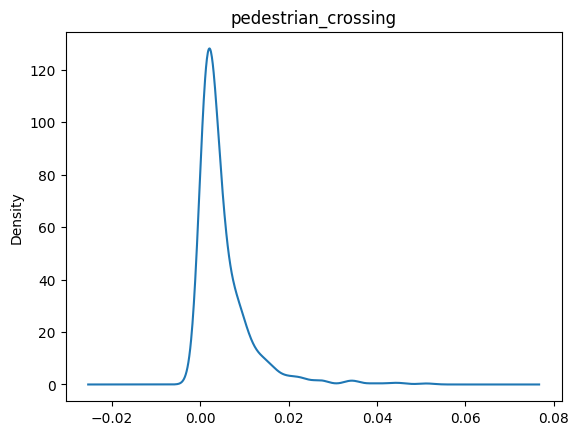

In [25]:
plot_area_dsitribution_per_class(df, "pedestrian_crossing")

idx : 0, label : T_juc_ahead
label: T_juc_ahead , total_annotations: 26
label: T_juc_ahead , total images: 26
label: T_juc_ahead , area distribution plot


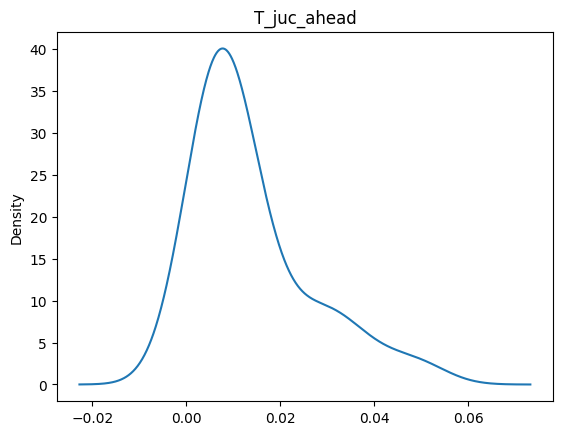

idx : 1, label : bend_ahead
label: bend_ahead , total_annotations: 114
label: bend_ahead , total images: 112
label: bend_ahead , area distribution plot


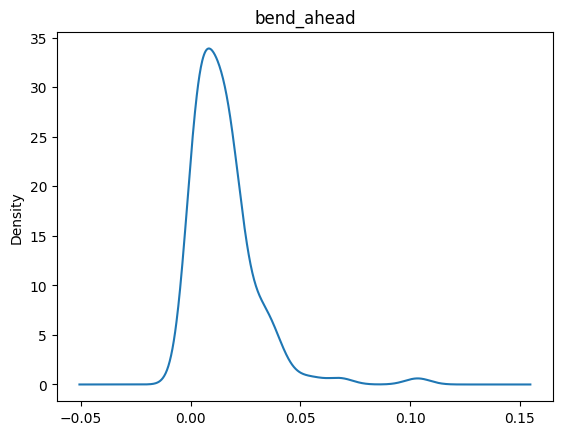

idx : 2, label : bus_only_lane
label: bus_only_lane , total_annotations: 207
label: bus_only_lane , total images: 190
label: bus_only_lane , area distribution plot


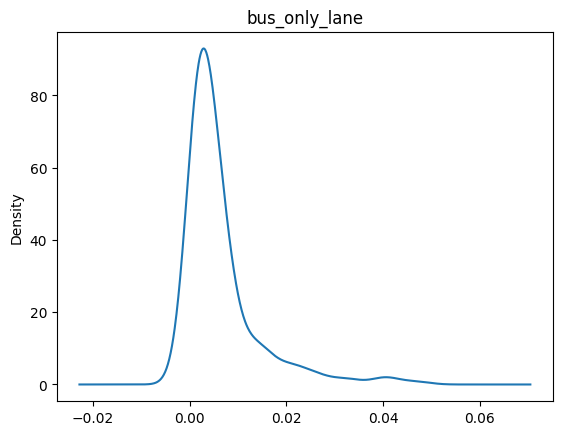

idx : 3, label : bus_stop
label: bus_stop , total_annotations: 87
label: bus_stop , total images: 87
label: bus_stop , area distribution plot


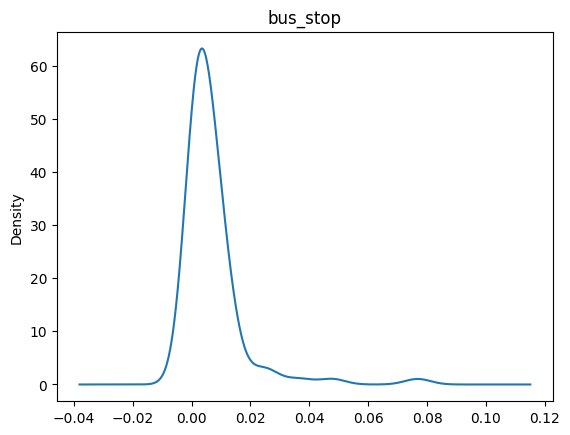

idx : 4, label : chevron_markers
label: chevron_markers , total_annotations: 516
label: chevron_markers , total images: 231
label: chevron_markers , area distribution plot


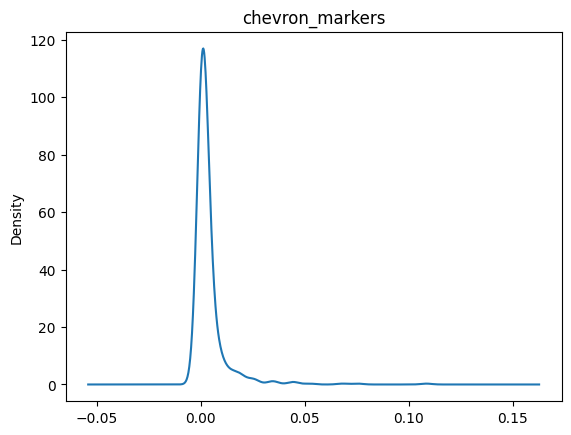

idx : 5, label : children_crossing_ahead
label: children_crossing_ahead , total_annotations: 68
label: children_crossing_ahead , total images: 68
label: children_crossing_ahead , area distribution plot


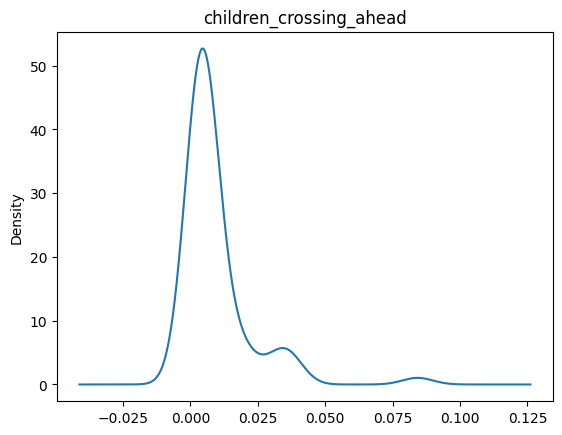

idx : 6, label : cross_roads_ahead
label: cross_roads_ahead , total_annotations: 19
label: cross_roads_ahead , total images: 19
label: cross_roads_ahead , area distribution plot


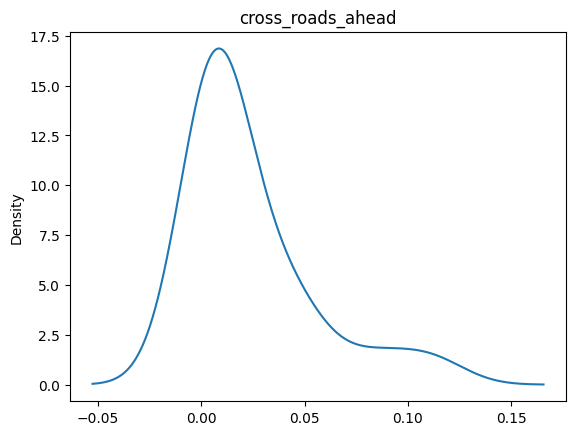

idx : 7, label : cycle_lane_ahead
label: cycle_lane_ahead , total_annotations: 14
label: cycle_lane_ahead , total images: 14
label: cycle_lane_ahead , area distribution plot


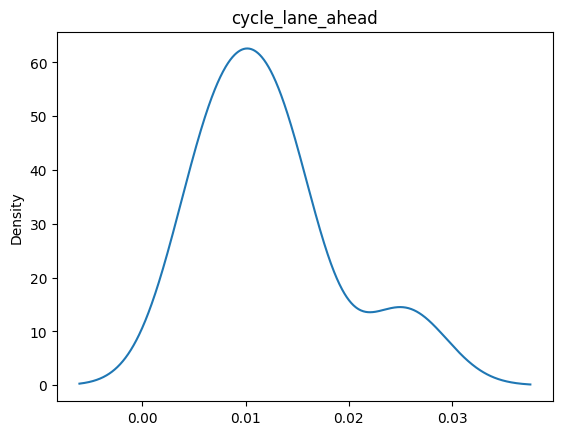

idx : 8, label : cycle_only_lane
label: cycle_only_lane , total_annotations: 4
label: cycle_only_lane , total images: 4
label: cycle_only_lane , area distribution plot


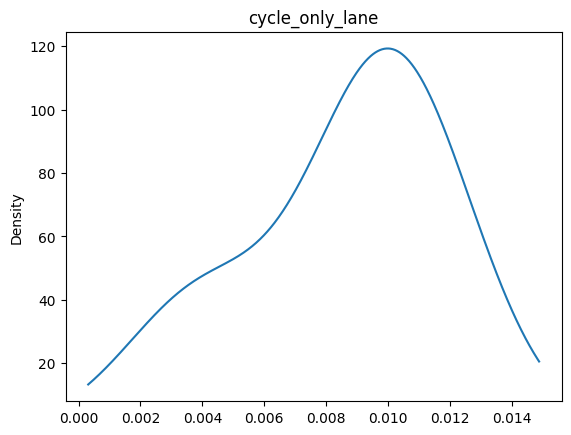

idx : 9, label : directional_express_way
label: directional_express_way , total_annotations: 380
label: directional_express_way , total images: 327
label: directional_express_way , area distribution plot


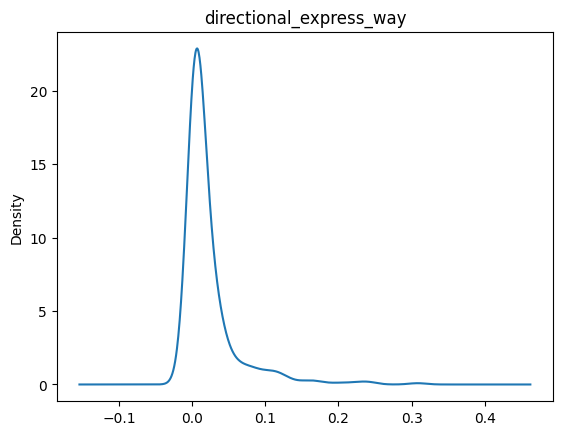

idx : 10, label : directional_normal
label: directional_normal , total_annotations: 571
label: directional_normal , total images: 498
label: directional_normal , area distribution plot


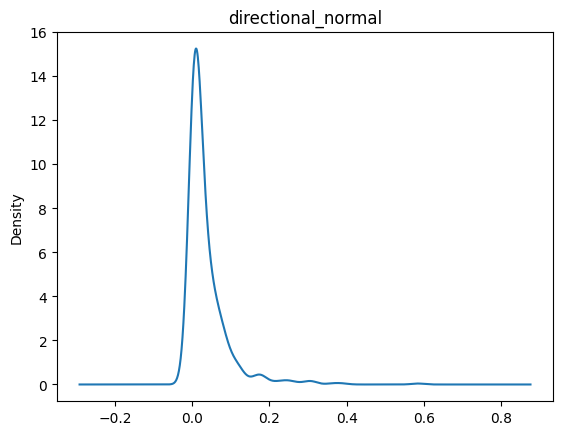

idx : 11, label : double_bend_ahead
label: double_bend_ahead , total_annotations: 7
label: double_bend_ahead , total images: 7
label: double_bend_ahead , area distribution plot


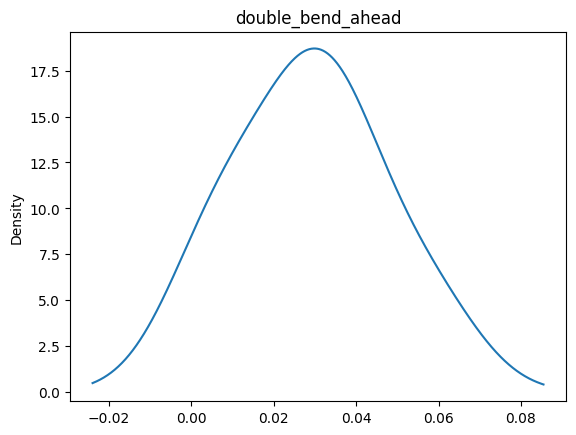

idx : 12, label : expressway
label: expressway , total_annotations: 137
label: expressway , total images: 137
label: expressway , area distribution plot


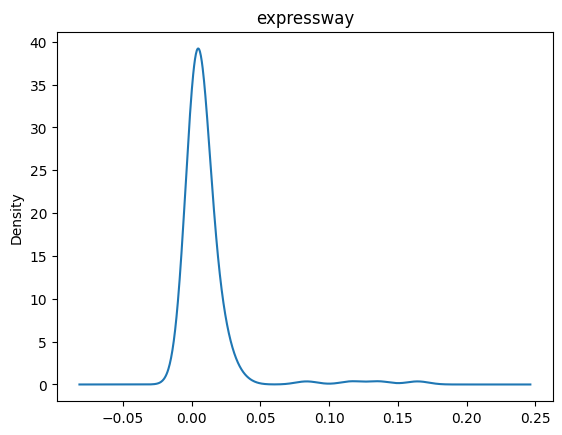

idx : 13, label : give_way
label: give_way , total_annotations: 40
label: give_way , total images: 40
label: give_way , area distribution plot


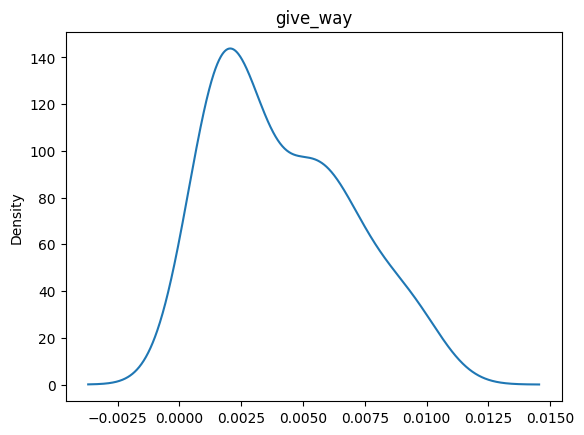

idx : 14, label : give_way_ahead
label: give_way_ahead , total_annotations: 20
label: give_way_ahead , total images: 20
label: give_way_ahead , area distribution plot


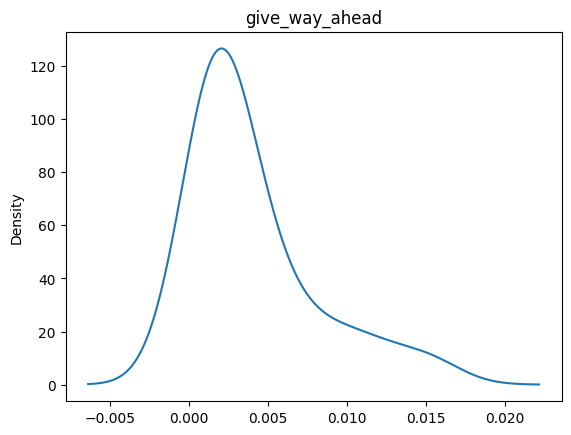

idx : 15, label : height_limit
label: height_limit , total_annotations: 40
label: height_limit , total images: 40
label: height_limit , area distribution plot


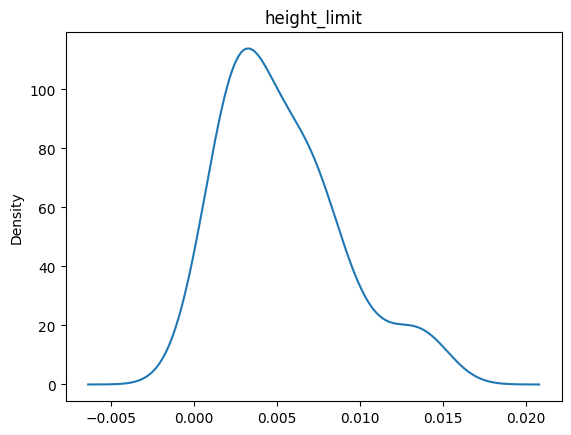

idx : 16, label : hospital
label: hospital , total_annotations: 21
label: hospital , total images: 21
label: hospital , area distribution plot


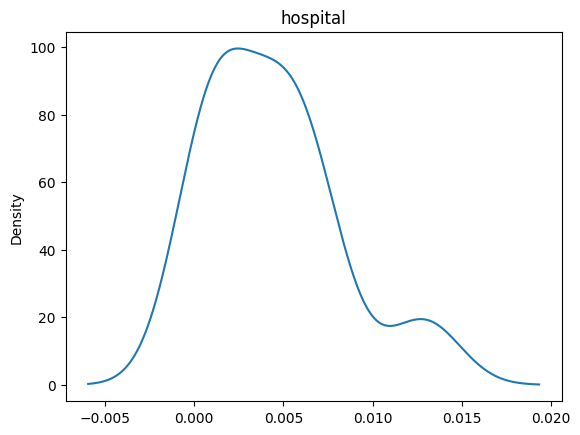

idx : 17, label : level_crossing
label: level_crossing , total_annotations: 89
label: level_crossing , total images: 85
label: level_crossing , area distribution plot


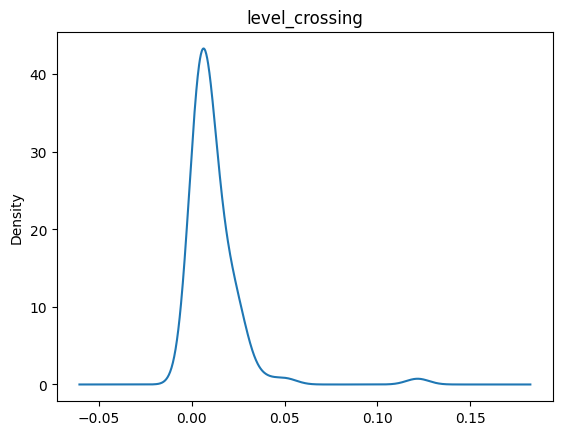

idx : 18, label : level_crossing_gates_ahead
label: level_crossing_gates_ahead , total_annotations: 21
label: level_crossing_gates_ahead , total images: 21
label: level_crossing_gates_ahead , area distribution plot


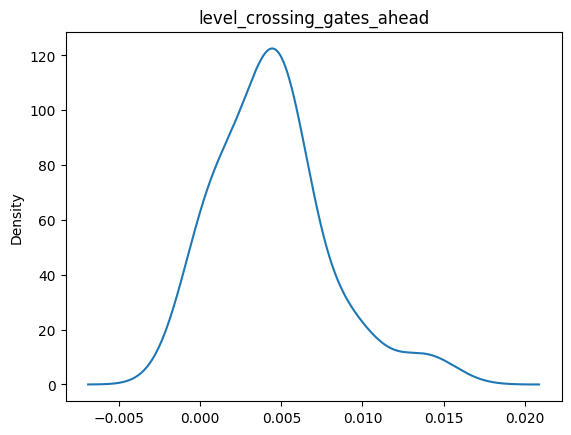

idx : 19, label : light_signal_ahead
label: light_signal_ahead , total_annotations: 61
label: light_signal_ahead , total images: 61
label: light_signal_ahead , area distribution plot


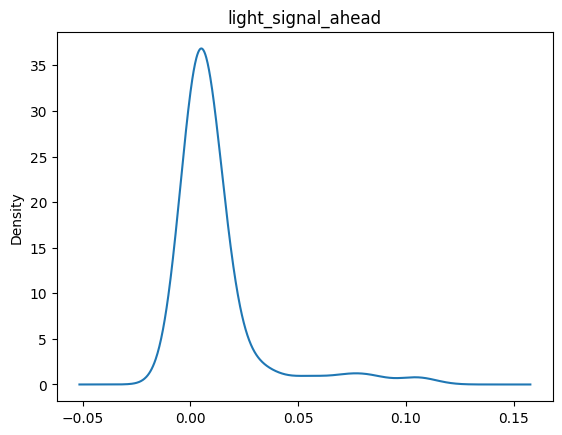

idx : 20, label : merge_ahead
label: merge_ahead , total_annotations: 226
label: merge_ahead , total images: 226
label: merge_ahead , area distribution plot


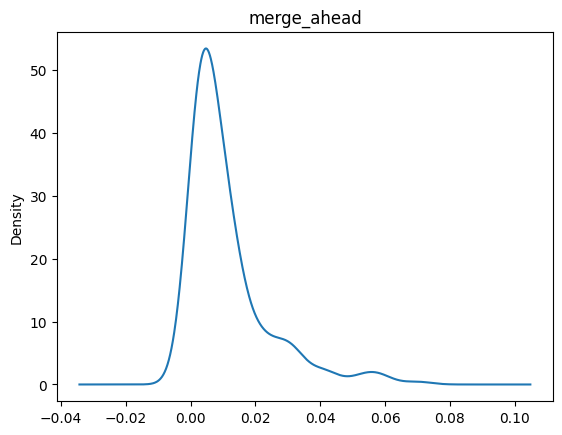

idx : 21, label : no_entry
label: no_entry , total_annotations: 63
label: no_entry , total images: 63
label: no_entry , area distribution plot


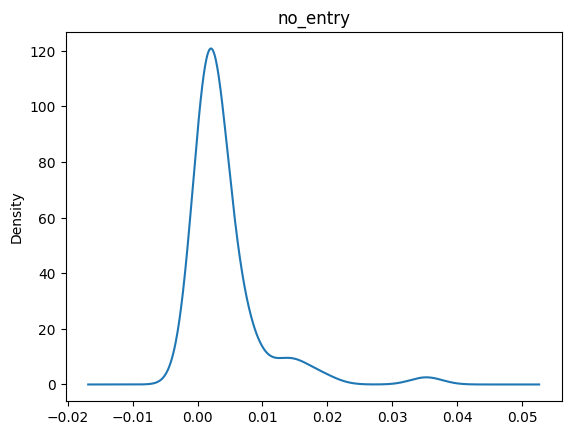

idx : 22, label : no_horning
label: no_horning , total_annotations: 44
label: no_horning , total images: 44
label: no_horning , area distribution plot


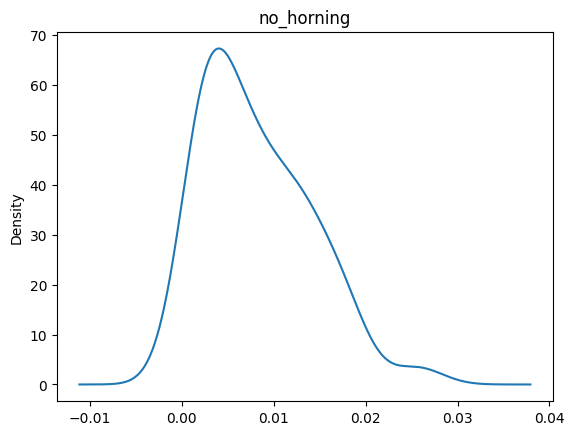

idx : 23, label : no_parking
label: no_parking , total_annotations: 138
label: no_parking , total images: 137
label: no_parking , area distribution plot


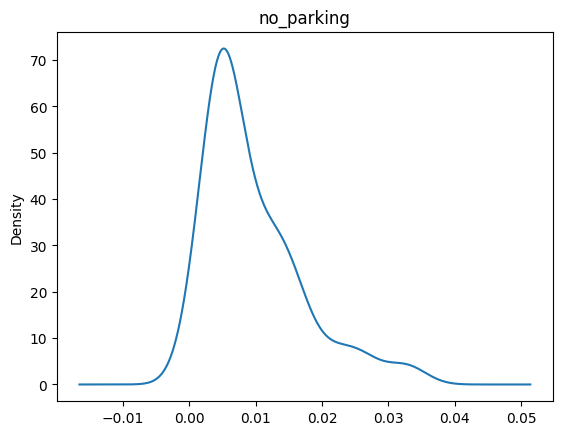

idx : 24, label : no_turn
label: no_turn , total_annotations: 321
label: no_turn , total images: 309
label: no_turn , area distribution plot


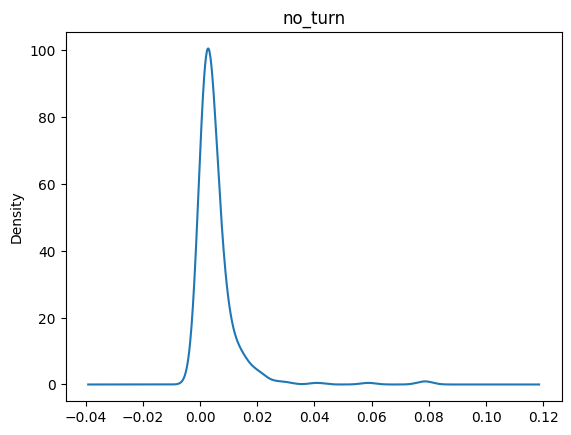

idx : 25, label : no_u_turn
label: no_u_turn , total_annotations: 81
label: no_u_turn , total images: 81
label: no_u_turn , area distribution plot


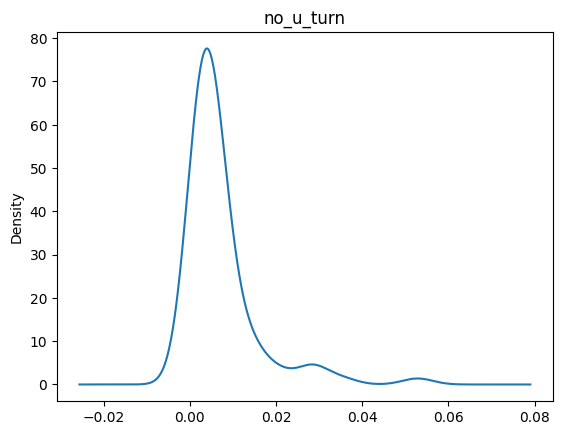

idx : 26, label : one_way
label: one_way , total_annotations: 22
label: one_way , total images: 22
label: one_way , area distribution plot


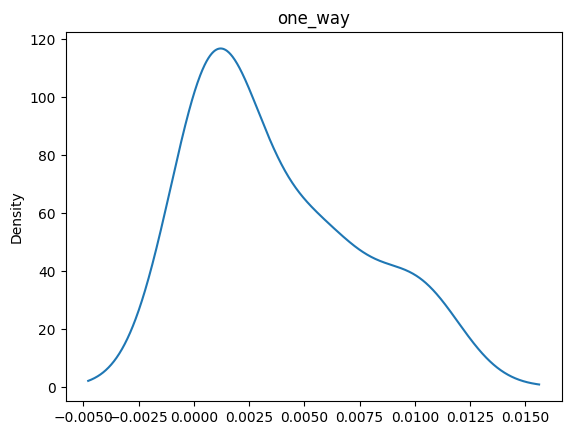

idx : 27, label : parking
label: parking , total_annotations: 43
label: parking , total images: 43
label: parking , area distribution plot


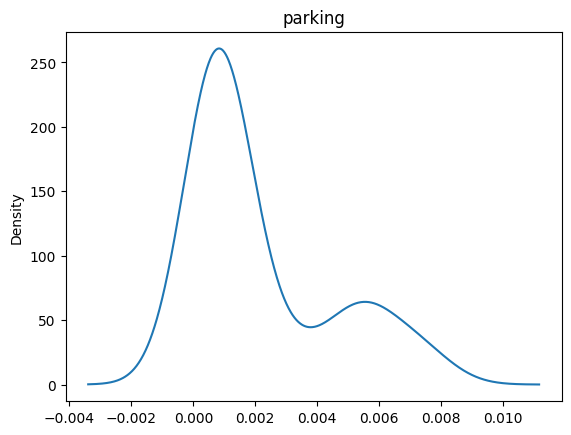

idx : 28, label : pass
label: pass , total_annotations: 187
label: pass , total images: 183
label: pass , area distribution plot


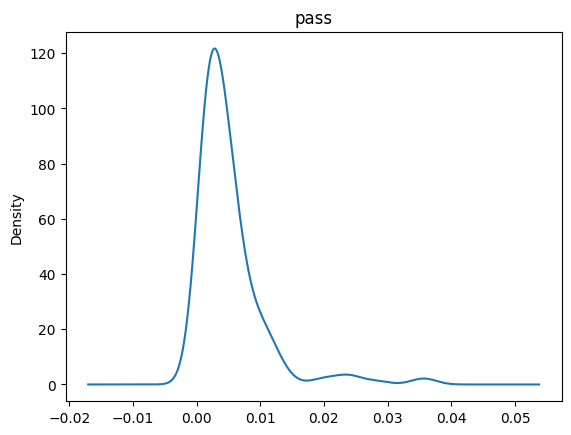

idx : 29, label : pedestrian_crossing
label: pedestrian_crossing , total_annotations: 607
label: pedestrian_crossing , total images: 520
label: pedestrian_crossing , area distribution plot


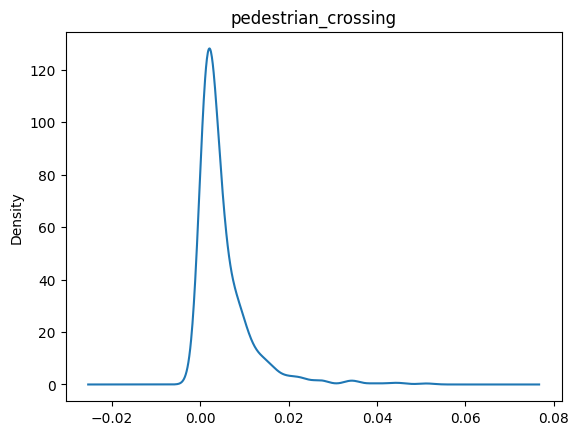

idx : 30, label : pedestrian_crossing_ahead
label: pedestrian_crossing_ahead , total_annotations: 352
label: pedestrian_crossing_ahead , total images: 352
label: pedestrian_crossing_ahead , area distribution plot


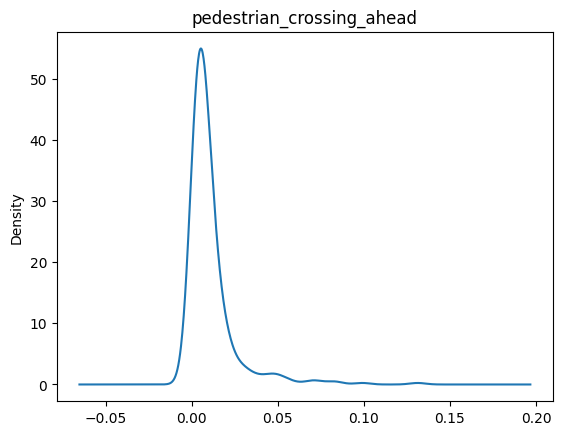

idx : 31, label : road_closed
label: road_closed , total_annotations: 31
label: road_closed , total images: 21
label: road_closed , area distribution plot


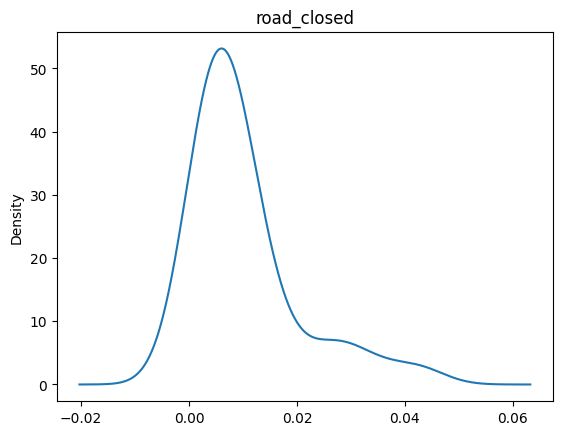

idx : 32, label : road_narrows_ahead
label: road_narrows_ahead , total_annotations: 33
label: road_narrows_ahead , total images: 33
label: road_narrows_ahead , area distribution plot


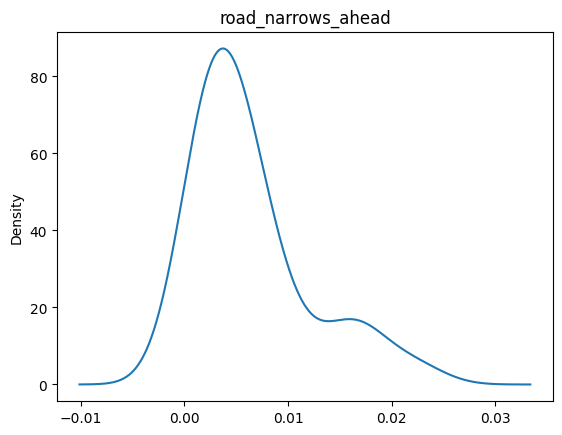

idx : 33, label : road_works_ahead
label: road_works_ahead , total_annotations: 34
label: road_works_ahead , total images: 34
label: road_works_ahead , area distribution plot


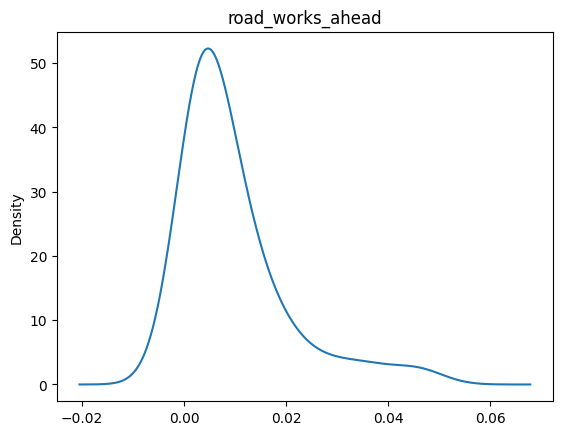

idx : 34, label : roundabout
label: roundabout , total_annotations: 44
label: roundabout , total images: 44
label: roundabout , area distribution plot


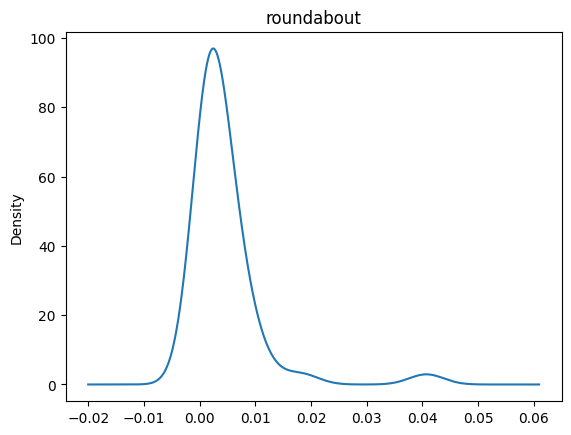

idx : 35, label : roundabout_ahead
label: roundabout_ahead , total_annotations: 64
label: roundabout_ahead , total images: 64
label: roundabout_ahead , area distribution plot


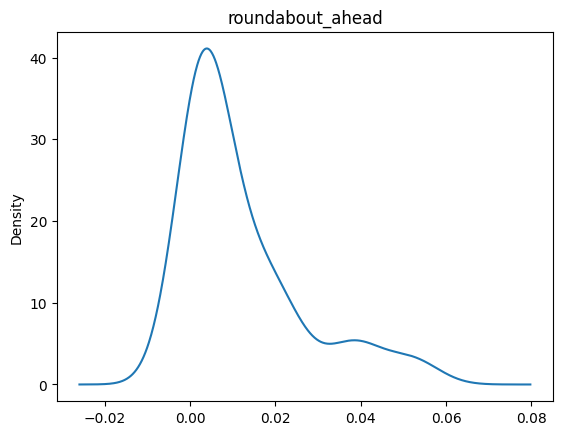

idx : 36, label : side_road
label: side_road , total_annotations: 86
label: side_road , total images: 84
label: side_road , area distribution plot


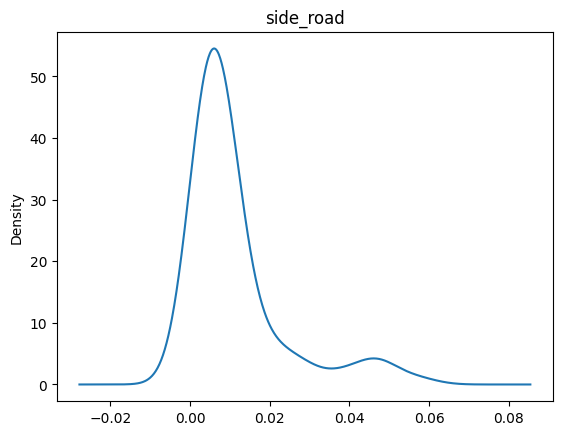

idx : 37, label : speed_limit
label: speed_limit , total_annotations: 459
label: speed_limit , total images: 425
label: speed_limit , area distribution plot


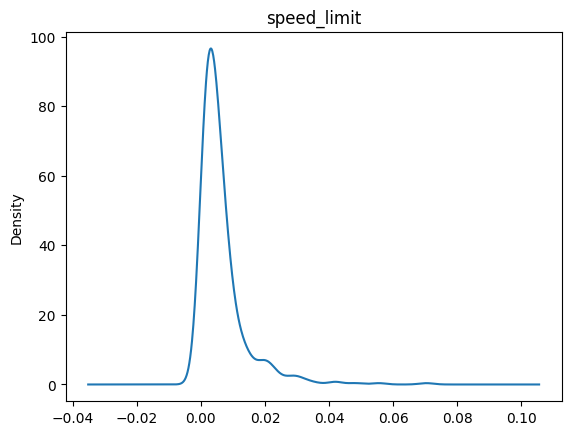

idx : 38, label : staggered_junc_ahead
label: staggered_junc_ahead , total_annotations: 20
label: staggered_junc_ahead , total images: 20
label: staggered_junc_ahead , area distribution plot


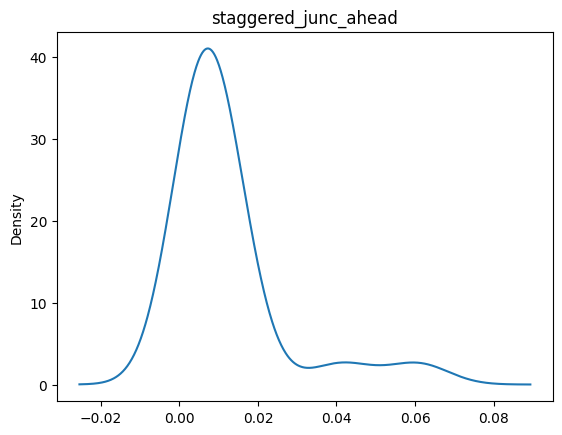

idx : 39, label : stop
label: stop , total_annotations: 113
label: stop , total images: 113
label: stop , area distribution plot


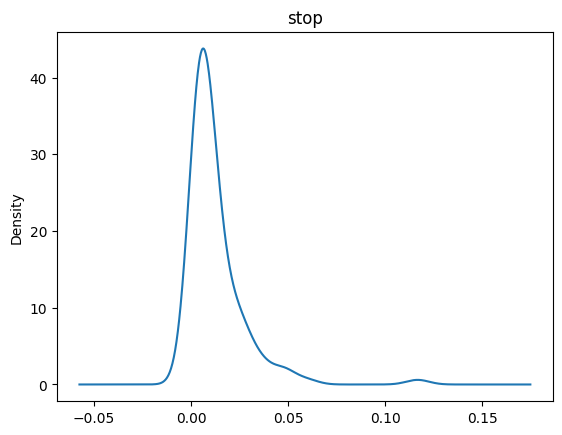

idx : 40, label : straight_ahead
label: straight_ahead , total_annotations: 4
label: straight_ahead , total images: 4
label: straight_ahead , area distribution plot


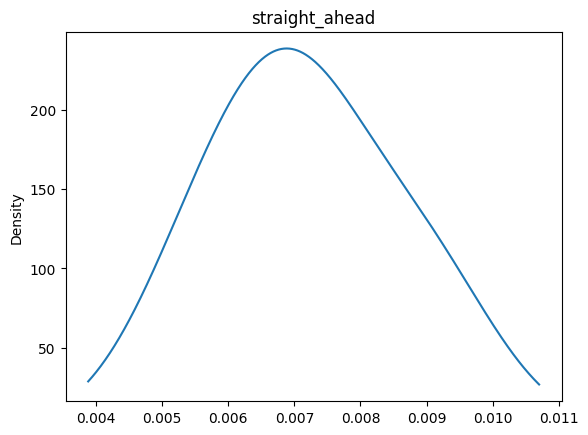

idx : 41, label : turn
label: turn , total_annotations: 26
label: turn , total images: 26
label: turn , area distribution plot


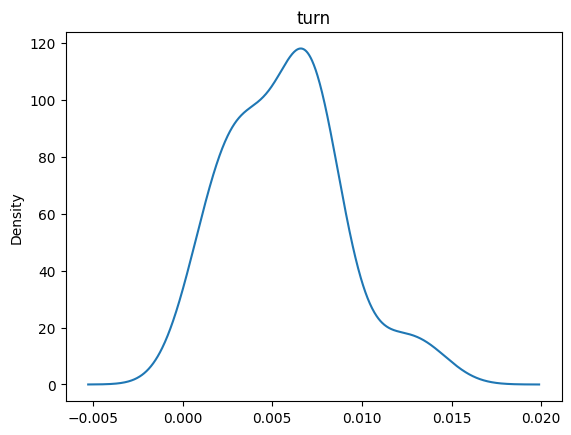

In [26]:
for x in LABELS:
    label = LABELS[x]
    print("idx : {}, label : {}".format(x, label))
    plot_area_dsitribution_per_class(df, label)

In [20]:
def metrics_per_class(_df, label):
    _label_df = _df.loc[_df['label'] == label]
    print("label: {} , total_annotations: {}".format(label, _label_df.shape[0]))
    print("label: {} , total images: {}".format(label, _label_df.path.unique().shape[0] ))

    

In [21]:
for x in LABELS:
    label = LABELS[x]
    print("idx : {}, label : {}".format(x, label))
    metrics_per_class(df, label)

idx : 0, label : T_juc_ahead
label: T_juc_ahead , total_annotations: 26
label: T_juc_ahead , total images: 26
idx : 1, label : bend_ahead
label: bend_ahead , total_annotations: 114
label: bend_ahead , total images: 112
idx : 2, label : bus_only_lane
label: bus_only_lane , total_annotations: 207
label: bus_only_lane , total images: 190
idx : 3, label : bus_stop
label: bus_stop , total_annotations: 87
label: bus_stop , total images: 87
idx : 4, label : chevron_markers
label: chevron_markers , total_annotations: 516
label: chevron_markers , total images: 231
idx : 5, label : children_crossing_ahead
label: children_crossing_ahead , total_annotations: 68
label: children_crossing_ahead , total images: 68
idx : 6, label : cross_roads_ahead
label: cross_roads_ahead , total_annotations: 19
label: cross_roads_ahead , total images: 19
idx : 7, label : cycle_lane_ahead
label: cycle_lane_ahead , total_annotations: 14
label: cycle_lane_ahead , total images: 14
idx : 8, label : cycle_only_lane
label:

#### Apply augmentations for selected labels

In [27]:
# This returns annotations for the paticular class, without other annotations for the class
def filter_by_label(_df, label):
    return _df.loc[_df['label'] == label]

In [28]:
labels_underrep = ["bus_stop",
"level_crossing",
"side_road",
"no_u_turn",
"children_crossing_ahead",
"roundabout_ahead",
"no_entry",
"light_signal_ahead"]

In [29]:
df_hospital = filter_by_label(df, "hospital")

In [30]:
df_hospital.shape

(21, 7)

In [31]:
def display_img(_df, index):
    label = _df.iloc[index]
    img_path = label["path"]
    print("Norm Area : {}".format(label["norm_area"]))
    image = mpimg.imread(img_path)
    plt.imshow(image)

Norm Area : 0.006591796875


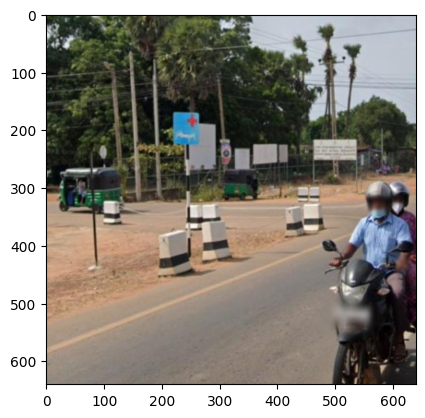

In [32]:
display_img(df_hospital, 10)

In [33]:


def show_df(_df):
    def update(i):
        row = _df.iloc[i]
        image = mpimg.imread(row["path"]) # images are color images
        plt.gca().clear()
        plt.imshow(image)

    return animation.FuncAnimation(plt.gcf(), update, _df.shape[0], interval = 1000, repeat=False)

In [34]:

labels_sev_underrep = ["no_horning", 
"roundabout", 
"parking", 
"give_way", 
"height_limit", 
"road_works_ahead", 
"road_narrows_ahead", 
"T_juc_ahead", 
"turn", 
"one_way", 
"hospital", 
"level_crossing_gates_ahead", 
"road_closed", 
"give_way_ahead", 
"staggered_junc_ahead", 
"cross_roads_ahead",]

In [35]:
df_no_horning = filter_by_label(df, "no_horning")

In [36]:
df_no_horning.shape

(44, 7)

In [ ]:
# %matplotlib notebook
# anim = show_df(df_no_horning)
# plt.show()

Norm Area : 0.006459960937500001


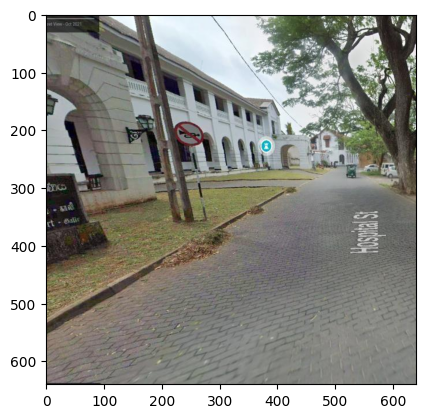

In [37]:
display_img(df_no_horning, 10)